In [40]:
import numpy as np 

In [41]:
class Linear_Regression():
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit( self, X, Y ):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = -(2*(self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = -2*np.sum(self.Y - Y_prediction)/self.m

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db



    def predict(self,X):
        return X.dot(self.w) + self.b

Model Implementation

In [42]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [43]:
salary_data = pd.read_csv('D:\Coding\AI & ML\Machine Learning\Data\salary_data.csv')
salary_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\jaisi\AppData\Local\Temp\ipykernel_9500\2104028661.py:1: SyntaxWarning: invalid escape sequence '\C'
  salary_data = pd.read_csv('D:\Coding\AI & ML\Machine Learning\Data\salary_data.csv')


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [44]:
salary_data.shape

(30, 2)

In [45]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [47]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,test_size=0.33)

In [48]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [49]:
model.fit(X_train,Y_train)

In [50]:
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [55]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


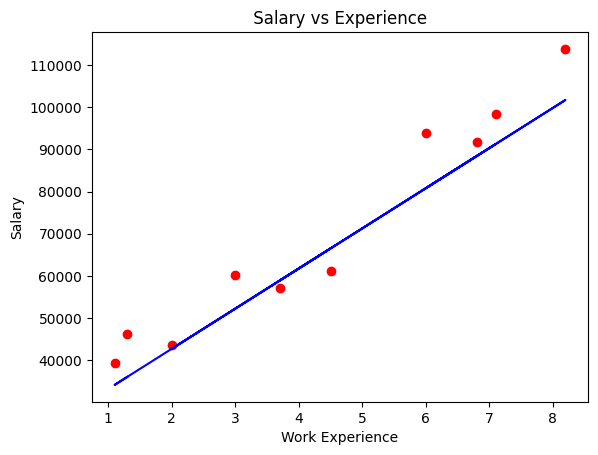

In [59]:
plt.scatter(X_test, Y_test,color = 'red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience ')
plt.show()